## Statistical analysis for crime data

### Navigation
* [README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md)
* [Clean data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/cleaned_data.csv)
* [Raw data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/raw_data.csv)
* [ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb)
* [Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb)
* [Dashboard - Business Crime Trends in London](https://public.tableau.com/views/LondonBusinessCrimeAnalysis/Dashboard1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

##### Import libralies and load dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../dataset/data_cleaned.csv')
df.head()

,Date,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Year,Month,Weekday
0,2024-06-10,Southwark,DRUG OFFENCES,POSSESSION OF DRUGS,Charged/Summonsed/Postal Requisition,Y,1,2024,6,Monday
1,2024-09-04,Lewisham,PUBLIC ORDER OFFENCES,PUBLIC FEAR ALARM OR DISTRESS,Investigation Complete; No Suspect Identified....,N,1,2024,9,Wednesday
2,2023-06-08,Islington,THEFT,SHOPLIFTING,Investigation Complete; No Suspect Identified....,N,18,2023,6,Thursday
3,2024-03-17,Newham,THEFT,SHOPLIFTING,Investigation Complete; No Suspect Identified....,N,3,2024,3,Sunday
4,2024-05-25,Lambeth,DRUG OFFENCES,POSSESSION OF DRUGS,Community resolution (Crime),Y,7,2024,5,Saturday


#### Statistics for Outcome Count

This Outcome Section isn't practical for the analysis I am performing as my dataset motly contains categorical data. As I need to prove my ability to understand statistical measure, I will perform some calculation using Outcome Count column. There will be no meaning for calculating other variables so I chose Outcome Count column to perform calculation.

In [3]:
df['Outcome Count'].mean()

np.float64(2.241415373888792)

The mean is the sum of all values divided by the number of values and it is the average. The average number of crime per borough is 1254

#### Median crime count per borough

In [4]:
df['Outcome Count'].median()

np.float64(1.0)

The Median is the middle value in a dataset. 

In [5]:
df['Outcome Count'].max()

np.int64(159)

Maximun value in the Outcome Count column

In [6]:
df['Outcome Count'].count()

np.int64(40159)

The total number of the data 

Showing the maximum value in the dataset.

#### Standard Deviation

In [7]:
df['Outcome Count'].std()

np.float64(3.774861073346619)

Standard deviation measures how spread out the data is. A high standard deviation means more variability. The standard deviation value (3.8) is bigger than the mean (2.2) which means the data is quite disparsed. The mean is bigger than median which suggest it has right skewed distribution. Most values are low btu some high values are pulling up the mean value. \
This analysis sugesst the value in Outcome Count is spread out.

#### Hypothesis Testing
Hypothesis testing helps assess if differences or relationships are statistically significant, not just due to chance.

First, install scripy

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
from scipy.stats import ttest_ind
import itertools

# Map 'Y'/'N' to 1/0
df['Closed'] = df['Positive Outcome'].map({'Y': 1, 'N': 0})

# Get top 10 boroughs by crime count
top_boroughs = df['Borough'].value_counts().nlargest(10).index

# Filter dataframe to include only those boroughs
filtered_df = df[df['Borough'].isin(top_boroughs)]

# Loop through all unique borough pairs
for b1, b2 in itertools.combinations(top_boroughs, 2):
    group1 = filtered_df[filtered_df['Borough'] == b1]['Closed']
    group2 = filtered_df[filtered_df['Borough'] == b2]['Closed']
    
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    
    print(f"{b1} vs {b2} -> t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

Westminster vs Newham -> t-statistic: 3.82, p-value: 0.0001
Westminster vs Camden -> t-statistic: 5.67, p-value: 0.0000
Westminster vs Tower Hamlets -> t-statistic: 5.10, p-value: 0.0000
Westminster vs Lambeth -> t-statistic: 4.95, p-value: 0.0000
Westminster vs Brent -> t-statistic: 4.03, p-value: 0.0001
Westminster vs Hackney -> t-statistic: 5.39, p-value: 0.0000
Westminster vs Southwark -> t-statistic: 6.00, p-value: 0.0000
Westminster vs Islington -> t-statistic: 4.57, p-value: 0.0000
Westminster vs Wandsworth -> t-statistic: 6.27, p-value: 0.0000
Newham vs Camden -> t-statistic: 1.79, p-value: 0.0729
Newham vs Tower Hamlets -> t-statistic: 1.30, p-value: 0.1936
Newham vs Lambeth -> t-statistic: 1.17, p-value: 0.2423
Newham vs Brent -> t-statistic: 0.33, p-value: 0.7380
Newham vs Hackney -> t-statistic: 1.65, p-value: 0.0986
Newham vs Southwark -> t-statistic: 2.26, p-value: 0.0237
Newham vs Islington -> t-statistic: 0.92, p-value: 0.3598
Newham vs Wandsworth -> t-statistic: 2.64, 

Top 3 statistically significant borough based on this comparison are
| Boroughs                  | t-statistic | p-value | 
| ---------------------------- | ----------- | ------- |
| **Westminster vs Southwark** | 15.98       | 0.0000  |
| **Westminster vs Hackney**   | 15.69       | 0.0000  |
| **Westminster vs Camden**    | 15.37       | 0.0000  |


t-statistic measures how far the sample mean is from the population mean. T-statistics 15 means there is a significant difference in the result from the test value.\
p-value tells the probability of getting results as they were by random chance or not. Small p-value (<0.05) is unlikely to be random chance.

All three involve Westminster, suggesting its closure rate is significantly higher (or lower) than others.
All p-values are < 0.001, meaning the differences are very unlikely due to chance.

All the comparison to Westminster shows 0.000 p-value so I will double check if this is an error.

In [10]:
# checking for positive outcome rate
df.groupby('Borough')['Closed'].mean().sort_values(ascending=False)

Borough
Westminster               0.171761
Bromley                   0.148591
Bexley                    0.136662
Sutton                    0.133236
Barking and Dagenham      0.131707
Havering                  0.130435
Kingston upon Thames      0.129496
Newham                    0.127698
Brent                     0.123746
Islington                 0.116865
Waltham Forest            0.115128
Lambeth                   0.114249
Hillingdon                0.114182
Tower Hamlets             0.112811
Croydon                   0.112583
Lewisham                  0.112252
Greenwich                 0.111111
Hackney                   0.108652
Camden                    0.107579
Kensington and Chelsea    0.107246
Haringey                  0.104669
Hounslow                  0.103506
Redbridge                 0.102142
Southwark                 0.101889
Ealing                    0.099709
Wandsworth                0.097242
Harrow                    0.096624
Merton                    0.093902
Hammersmith 

Westminster has the highest closure rate compared to other boroughs so the p-value isn't an error. 

This hypothesis testing can conclude Westminster is the most satistically significant borough in closing crime case.

### Linear regression

Here I will make lineaar regression model that will predict future crime count in borough of Westminster.

In [11]:
# Firstly, install scikit-learn
!pip install scikit-learn

In [12]:
# Convert Date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Filter for Westminster only
westminster_df = df[df['Borough'] == 'Westminster']

# Group by month and count number of crimes
monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


C:\Users\Kaori\AppData\Local\Temp\ipykernel_30148\2771093295.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


In [13]:
# Create numeric month index for regression (e.g., 0, 1, 2...)
monthly_crimes['MonthIndex'] = range(len(monthly_crimes))

In [14]:
from sklearn.linear_model import LinearRegression

# Features and target
X = monthly_crimes[['MonthIndex']]
y = monthly_crimes['CrimeCount']

# Fit model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Predict next 6 months
future_months = pd.DataFrame({'MonthIndex': range(len(monthly_crimes), len(monthly_crimes) + 6)})
future_preds = model.predict(future_months)

# Combine predictions with month index
future_months['PredictedCrimeCount'] = future_preds

C:\Users\Kaori\AppData\Local\Temp\ipykernel_30148\922015345.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_dates = pd.date_range(


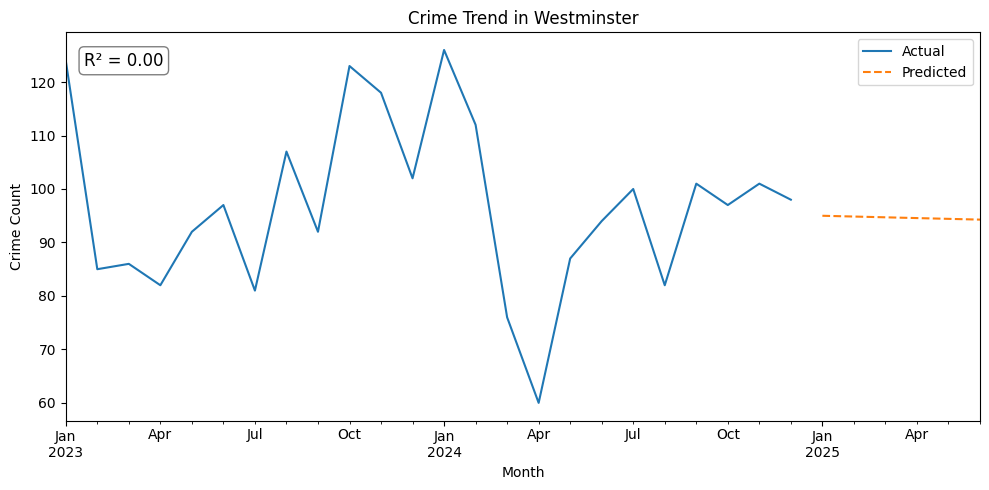

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Extend the date range to cover future months
all_dates = pd.date_range(
    start=monthly_crimes['Date'].min(),
    periods=len(monthly_crimes) + 6,
    freq='M'
)

# combine actual and predicted crime counts
all_crimes = pd.Series(
    list(monthly_crimes['CrimeCount']) + list(future_preds),
    index=all_dates
)

# predict values
y_pred = model.predict(X)

# calcurate R squared value
r2 =r2_score(y,y_pred)

# plot historical and future
plt.figure(figsize=(10, 5))
all_crimes[:len(monthly_crimes)].plot(label='Actual')
all_crimes[len(monthly_crimes):].plot(label='Predicted', linestyle='--')
plt.text(0.02, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
plt.title('Crime Trend in Westminster')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.show()

The R squared value tells how well the model is predicting the future trend. R squared value is displayed between 0 to 1. Closer to 0 means prediction model has low accuracy.

As this R squared value is 0, this model isn't reliable. I am creating a new model to make a better prediction.

#### Second try for creating regression model

I will use the following code that was created from the last model.

`df['Date']` = `pd.to_datetime(df['Date'])`\
`westminster_df` = `df[df['Borough']` == `'Westminster']`\
`monthly_crimes` = `westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')`


Adding feature engineering for seasonality

In [17]:
# encode 'Month' as cyclical features using sine and cosine to capture seasonality
monthly_crimes['Month'] = monthly_crimes['Date'].dt.month
monthly_crimes['Month_sin'] = np.sin(2 * np.pi * monthly_crimes['Month'] / 12)
monthly_crimes['Month_cos'] = np.cos(2 * np.pi * monthly_crimes['Month'] / 12)

Build and fit the improved regression model\
 Create a polynomial regression model with Ridge regularisation. This allows to capture non-linear seasonal trends in the crime data

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# input features with seasonal encoding
X_cyclical = monthly_crimes[['Month_sin', 'Month_cos']].values
model = LinearRegression()
model.fit(X_cyclical, y)

# crime count per month 
y = monthly_crimes['CrimeCount'].values

model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X, y)


,steps,"[('polynomialfeatures', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,alpha,1.0
,fit_intercept,True
,copy_X,True


Create future months and apply the same cyclical encoding

In [19]:
future_months = pd.date_range(monthly_crimes['Date'].max() + pd.offsets.MonthBegin(1), periods=6, freq='MS')
future_df = pd.DataFrame({
    'Date': future_months,
    'Month': future_months.month,
})
future_df['Month_sin'] = np.sin(2 * np.pi * future_df['Month'] / 12)
future_df['Month_cos'] = np.cos(2 * np.pi * future_df['Month'] / 12)

# create a new linear regression model from scikit-learn
model = LinearRegression()
model.fit(monthly_crimes[['Month_sin', 'Month_cos']], monthly_crimes['CrimeCount'])

# predict future crime counts using the trained model
X_future = future_df[['Month_sin', 'Month_cos']]
future_preds = model.predict(X_future)

# calculate R² for cyclical model
y_pred2 = model.predict(X_cyclical)
r2_cyclical = r2_score(y, y_pred2)


c:\Users\Kaori\projects\crime-data-analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Plot the results

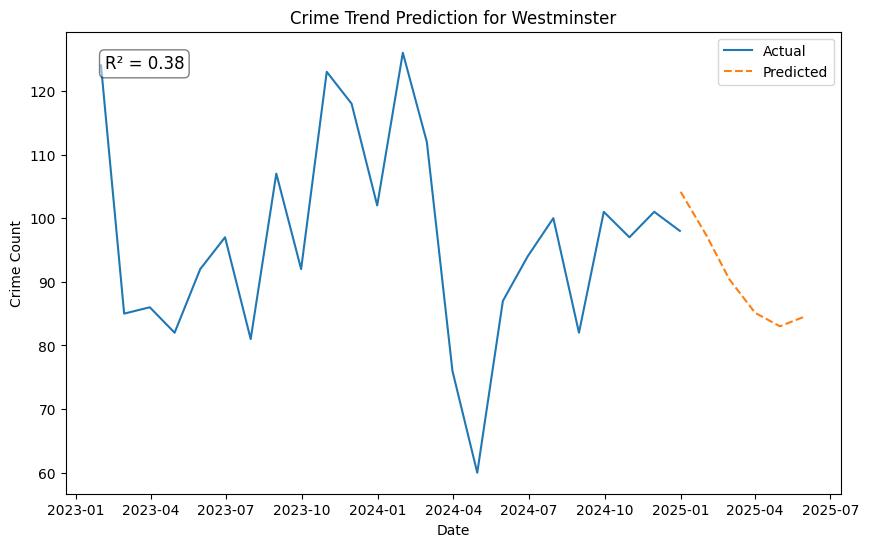

In [20]:
plt.figure(figsize=(10,6))
plt.plot(monthly_crimes['Date'], y, label='Actual')
plt.plot(future_df['Date'], future_preds, label='Predicted', linestyle='--')
plt.title("Crime Trend Prediction for Westminster")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.text(0.05, 0.95, f'R² = {r2_cyclical:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
plt.show()


The first model didn't include cyclical patterns (trends that repeat over time in a non-linear and non-fixed way) which led to poor perfomance. The second model adds adds features that make sense for monthly data, leading to improved predictive power.\
R² value also shows the improvements in prediction.

Go back to \
[README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md) / 
[ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb) /
[Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb) / [Dashboard](https://public.tableau.com/views/LondonBusinessCrimeAnalysis/Dashboard1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)